<img src="imgs/logo-spegc.svg" width=30%>

# Regresión Lineal

En un problema de regresión lineal intentamos buscar la recta $y=mx+b$ que mejor se adapte a unos puntos o muestras ($X$ e $Y$). Esto lo hacemos minimizando una función de error $E$ que definimos como el sumatorio del cuadrado de la distancia entre el valor $y$ real de la muestra y el dado por la recta $mx+b$.

$$ E(m,b) = \sum_{i=1}^{m}{(mx_i + b - y_i)^2} $$

Si buscamos el mínimo de esta función mediante el método de descenso por el gradiente, deberemos calcular la derivada parcial de cada parámetro ($m$ y $b$) implicado en la función de la recta.

$$ \frac{\partial E}{\partial m} =  \sum_{i=1}^{m}{2(mx_i + b - y_i)x_i } $$

$$ \frac{\partial E}{\partial b} =  \sum_{i=1}^{m}{2(mx_i + b - y_i) } $$

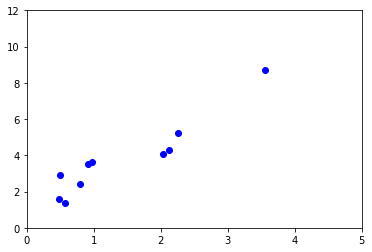

In [35]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.5 # mean and standard deviation
noise = np.random.normal(mu, sigma, 10)

X = np.random.rand(10)*5
Y = 2*X + 1 + noise
 
plt.axis([0, 5, 0, 12])
plt.plot(X,Y,'bo')
plt.show()

In [36]:
m = np.random.normal(0, 1)
b = np.random.normal(0, 1)

lr = 0.01

for _ in range(1000):

    #loss = np.sum(np.power(((m*X + b) - Y), 2))
    
    derivative_m = np.sum(2*((m*X + b) - Y) * X)
    derivative_b = np.sum(2*((m*X + b) - Y) * 1.0)
    
    m = m - derivative_m * lr
    b = b - derivative_b * lr
    
print(m, b)


1.9295469458951486 1.0408201221343063


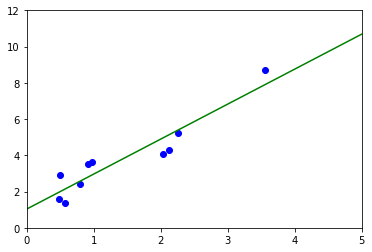

In [39]:
x = np.arange(0,6)
y = m*x + b

plt.axis([0, 5, 0, 12])
plt.plot(X,Y,'bo')

plt.plot(x,y, 'g')
plt.show()

## Representación gráfica

In [41]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly


# The grid
m = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)
M, B = np.meshgrid(m, b)

mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, 10)

X = np.random.rand(10)*5
Y = 2*X + 1 + noise  # m=2, b=1

loss = 0
for x, y in zip(X, Y):
    loss += np.power(((M*x + B) - y), 2)

plotly.offline.init_notebook_mode(connected=True)

data = go.Surface(
        opacity=1,
        x = m,
        y = b,
        z = loss
    )

layout = go.Layout(
    title='Error de la regresión lineal',
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=[data], layout=layout)
plotly.offline.iplot(fig)

## Ejemplo con scikit-learn
https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


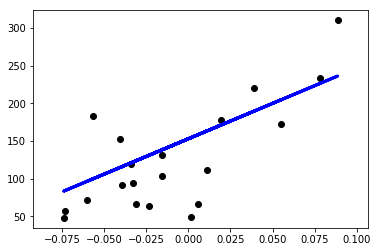

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

## Ejercicios

Crea un ejemplo de dataset de tres dimensiones, aplica **regresión lineal** y calcula el error medio sobre un conjunto de test.